# Tema 5: Actividad 1 - Aplica y analiza un método de detección de anomalías para resolver el problema que se plantea
### Autor: Juan José Méndez Torrero

## 1. Instalamos PyOD

In [1]:
# !pip install PyOD

## 2. Importamos las librerías necesarias

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyod.models.cblof import CBLOF
from pyod.utils.data import generate_data
from pyod.utils.example import visualize
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

## 3. Generamos el conjunto de datos

In [3]:
contamination = 0.05
n_train = 500  
n_test = 100
n_dimensions = 2
random_state = 12

X_train, X_test, y_train, y_test = generate_data(n_train=n_train, n_test=n_test, n_features=n_dimensions, behaviour='new', contamination=contamination, random_state=random_state)

## 4. Visalización de los datos

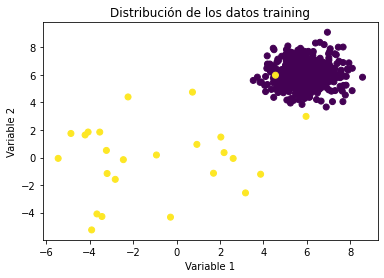

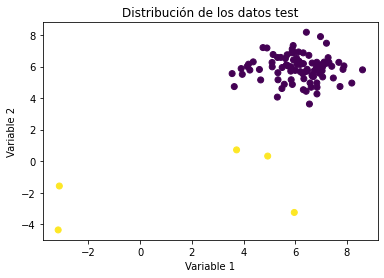

In [4]:
XY_train = pd.DataFrame({"Variable 1": X_train[:,0], "Variable 2": X_train[:,1], "Anomalía": y_train})

plt.scatter(XY_train['Variable 1'], XY_train['Variable 2'], c=XY_train['Anomalía'])
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title("Distribución de los datos training")
plt.show()

XY_test = pd.DataFrame({"Variable 1": X_test[:,0], "Variable 2": X_test[:,1], "Anomalía": y_test})

plt.scatter(XY_test['Variable 1'], XY_test['Variable 2'], c=XY_test['Anomalía'])
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title("Distribución de los datos test")
plt.show()

## 5. Aplicación del método CBLOF

In [5]:
clf = CBLOF(
    alpha=0.9,
    beta=5,
    check_estimator=False,
    clustering_estimator=None,
    contamination=contamination,
    n_clusters=8,
    n_jobs=None,
    random_state=None,
    use_weights=False
)

clf.fit(X_train)

y_train_pred = clf.labels_  
y_train_scores = clf.decision_scores_

y_test_pred = clf.predict(X_test)  
y_test_scores = clf.decision_function(X_test)

## 6. Comentario de los resultados usando gráficas

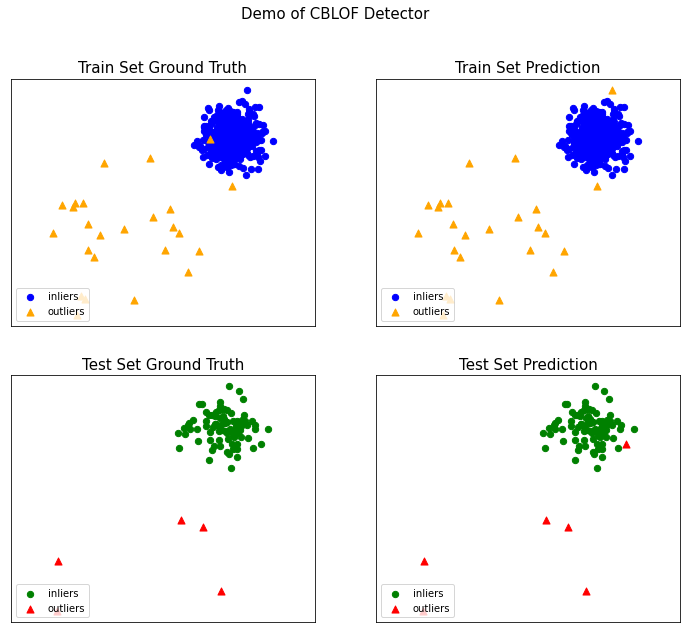

In [6]:
visualize("CBLOF", X_train, y_train, X_test, y_test, y_train_pred, y_test_pred, show_figure=True, save_figure=False)

#### Comentario
Se puede observar que el algoritmo _CBLOF_ ha clasificado bien la mayoría de las instancias anómalas, aunque, en el caso de Train, el algoritmo ha clasificado una instancia normal como anómala, y una instancia anómala como normal. Para el caso de Test, el algoritmo ha confundido una instancia normal como anómala. Esto resultados pueden haber ocurrido ya que _CBLOF_ es un algoritmo basádo en agrupamiento, con lo que, instancias un poco más lejanas de un agrupamiento serán consideradas como anómalas cuando no lo son, y en el caso de encontrarse una anomalía dentro de una agrupación, será considerada como normal. Esto puede ser observado en el caso de Train.

## 7. Comentario de los resultados usando métricas

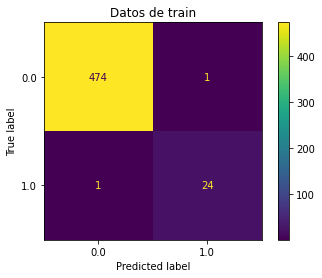

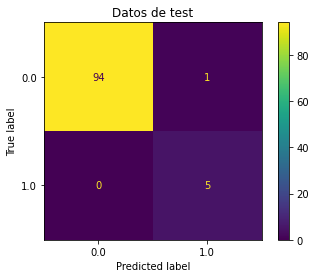

------------------
Medidas para train
------------------
Sensibilidad :  0.96
Especificidad:  0.9978947368421053
Precisión:  0.96
ROC-AUC:  0.9789473684210526
------------------
Medidas para test
------------------
Sensibilidad :  1.0
Especificidad:  0.9894736842105263
Precisión:  0.8333333333333334
ROC-AUC:  0.9947368421052631


In [7]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.title("Datos de train")
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.title("Datos de test")
plt.show()

print('------------------')
print('Medidas para train')
print('------------------')

cm = confusion_matrix(y_train,y_train_pred)

sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensibilidad : ', sensitivity )
specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Especificidad: ', specificity)
precision = cm[1,1]/(cm[1,1]+cm[0,1])
print('Precisión: ', precision)


print('ROC-AUC: ', roc_auc_score(y_train, y_train_pred, average=None))


print('------------------')
print('Medidas para test')
print('------------------')

cm = confusion_matrix(y_test,y_test_pred)

sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensibilidad : ', sensitivity )
specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Especificidad: ', specificity)
precision = cm[1,1]/(cm[1,1]+cm[0,1])
print('Precisión: ', precision)


print('ROC-AUC: ', roc_auc_score(y_test, y_test_pred, average=None))

#### Comentario
Como se ha podido observar en las figuras, los resultados obtenidos por este algoritmo son bastante buenos, aunque, en el caso de encontrarse una instancia anómala, como es el caso de train, dentro de una agrupación de datos normales, a este tipo de algoritmo le será muy complicado clasificar como anomalía esa instancia.

## 8. Resultados usando un mayor porcentaje de anomalías

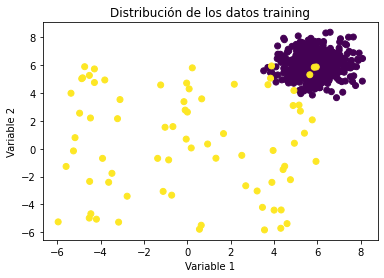

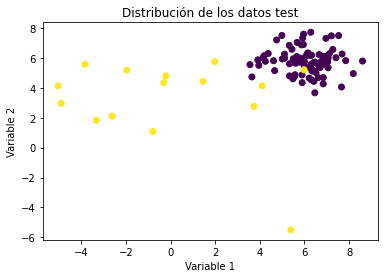

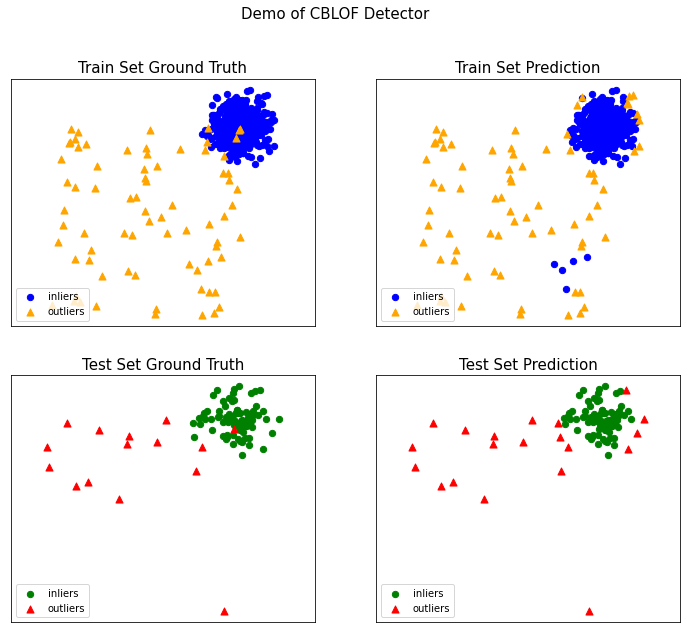

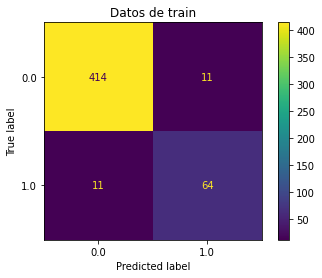

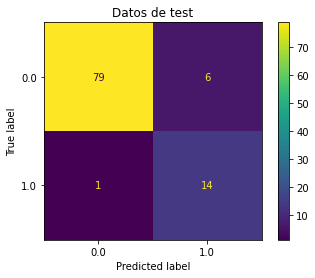

------------------
Medidas para train
------------------
Sensibilidad :  0.8533333333333334
Especificidad:  0.9741176470588235
Precisión:  0.8533333333333334
ROC-AUC:  0.9137254901960785
------------------
Medidas para test
------------------
Sensibilidad :  0.9333333333333333
Especificidad:  0.9294117647058824
Precisión:  0.7
ROC-AUC:  0.9313725490196079


In [8]:
contamination = 0.15
n_train = 500  
n_test = 100
n_dimensions = 2
random_state = 12

X_train, X_test, y_train, y_test = generate_data(n_train=n_train, n_test=n_test, n_features=n_dimensions, behaviour='new', contamination=contamination, random_state=random_state)

XY_train = pd.DataFrame({"Variable 1": X_train[:,0], "Variable 2": X_train[:,1], "Anomalía": y_train})

plt.scatter(XY_train['Variable 1'], XY_train['Variable 2'], c=XY_train['Anomalía'])
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title("Distribución de los datos training")
plt.show()

XY_test = pd.DataFrame({"Variable 1": X_test[:,0], "Variable 2": X_test[:,1], "Anomalía": y_test})

plt.scatter(XY_test['Variable 1'], XY_test['Variable 2'], c=XY_test['Anomalía'])
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title("Distribución de los datos test")
plt.show()

clf = CBLOF(
    alpha=0.9,
    beta=5,
    check_estimator=False,
    clustering_estimator=None,
    contamination=contamination,
    n_clusters=8,
    n_jobs=None,
    random_state=None,
    use_weights=False
)

clf.fit(X_train)

y_train_pred = clf.labels_  
y_train_scores = clf.decision_scores_

y_test_pred = clf.predict(X_test)  
y_test_scores = clf.decision_function(X_test)

visualize("CBLOF", X_train, y_train, X_test, y_test, y_train_pred, y_test_pred, show_figure=True, save_figure=False)

ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.title("Datos de train")
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.title("Datos de test")
plt.show()

print('------------------')
print('Medidas para train')
print('------------------')

cm = confusion_matrix(y_train,y_train_pred)

sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensibilidad : ', sensitivity )
specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Especificidad: ', specificity)
precision = cm[1,1]/(cm[1,1]+cm[0,1])
print('Precisión: ', precision)


print('ROC-AUC: ', roc_auc_score(y_train, y_train_pred, average=None))


print('------------------')
print('Medidas para test')
print('------------------')

cm = confusion_matrix(y_test,y_test_pred)

sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensibilidad : ', sensitivity )
specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Especificidad: ', specificity)
precision = cm[1,1]/(cm[1,1]+cm[0,1])
print('Precisión: ', precision)


print('ROC-AUC: ', roc_auc_score(y_test, y_test_pred, average=None))

#### Comentario

Para un mayor número de instancias anómalas, se puede observar que el algoritmo consigue peores resultados, ya que, en el caso de _Train_, se puede observar que el algoritmo ha clasificado como normales, una mayor número de instancias anómalas, siendo esto bastante alarmante si estuvieramos en un caso en el que las anomalías fueran situaciones catastróficas.

En el caso de _Test_, el algoritmo ha clasificado como anómalas un mayor número de instancias normales (6), siendo esto un caso en el que una empresa pudiera haber desperdiciado mucho dinero en revisiones de componentes innecesarias.